https://fluruorubber.top/2020/01/14/Performance-of-Multi-armed-Bandit-Algorithms/  
https://brunch.co.kr/@chris-song/66  

In [1]:
import random 
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style

from scipy.stats import bernoulli
from scipy.stats import beta

## 1. $\epsilon$- greedy
 
  

In [317]:
# motivation example 
time_lst = [i+1 for i in range(10)]
action_lst = [np.random.binomial(n=1, p= 0.7, size=1)[0] for i in range(10)]
bandit_lst = [random.randint(0,2) for i in range(10)]

map_dict = {0:'활용', 1:'탐색'}
action = [map_dict[action] for action in action_lst]

df = pd.DataFrame({'time':time_lst, 'action':action, 'bandit':bandit_lst})
df

,time,action,bandit
0,1,탐색,1
1,2,탐색,2
2,3,탐색,1
3,4,활용,2
4,5,탐색,0
5,6,탐색,2
6,7,활용,2
7,8,탐색,0
8,9,탐색,2
9,10,탐색,0


In [289]:
epsilon = 0.7 # exploration rate 
N = 10 

bandit_0 = []
bandit_1 = []
bandit_2 = []

for iteration in range(100):
    
    # Initialize 
    Q_lst = [0.0, 0.0, 0.0]
    N_lst = [0, 0, 0]
    
    bandit_reward_prob = {0: 0.2, 1: 0.5, 2: 0.8}
    bandit_0_reward_lst = [-1 for i in range(N)]
    bandit_1_reward_lst = [-1 for i in range(N)]
    bandit_2_reward_lst = [-1 for i in range(N)]
    
    # Generate reward 
    r = []
    for i in range(3):
        reward_lst = list(np.random.binomial(n=1, p= bandit_reward_prob[i], size=10)) #size = N
        r.append(reward_lst) 
    
    # Run
    for t in range(N): 

        # generate action
        action = np.random.binomial(n=1, p= epsilon, size=1)[0] 
        
        # choose bandit 
        if action == 1: 
            # exploration
            bandit = random.randint(0,2) # bandit 0~2중 랜덤으로 1개 선택 
        else: 
            # explotitation
            bandit = Q_lst.index(max(Q_lst)) # Q가 가장 큰 bandit선택

        # update N
        N_lst[bandit] += 1   

        # update Q 
        Q_lst[bandit] = Q_lst[bandit] + (1/N_lst[bandit])*(r[bandit][t]- Q_lst[bandit]) #reward = r[bandit][t]
        
        # regret 
        action = Q_lst[bandit] 
        optimal_action = max(Q_lst)
        regret = optimal_action-action

        # save reward 
        if bandit == 0:
            bandit_0_reward_lst[t] = r[bandit][t]
        elif bandit == 1:
            bandit_1_reward_lst[t] = r[bandit][t]
        else:
            bandit_2_reward_lst[t] = r[bandit][t]
    
    bandit_0.append(bandit_0_reward_lst)
    bandit_1.append(bandit_1_reward_lst)
    bandit_2.append(bandit_2_reward_lst)


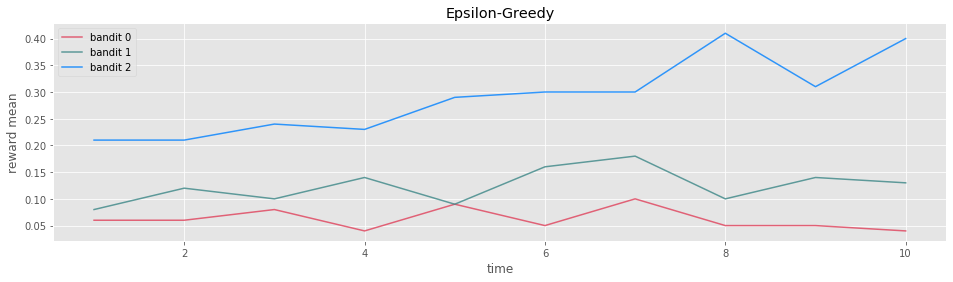

In [308]:
bandit_0_res = []
bandit_1_res = []
bandit_2_res = []

for i in range(N):
    b0=0 ; b1=0 ; b2=0
    for j in range(100):
        
        if bandit_0[j][i] != -1:
            b0 += bandit_0[j][i]
        if bandit_1[j][i] != -1:
            b1 += bandit_1[j][i]
        if bandit_2[j][i] != -1:
            b2 += bandit_2[j][i]
            
    bandit_0_res.append(b0/100)
    bandit_1_res.append(b1/100)
    bandit_2_res.append(b2/100)

# Visualize result 
time_lst = [i+1 for i in range(N)]

plt.figure(figsize=(16,4))
style.use('ggplot')
plt.plot(time_lst, bandit_0_res, color = '#df405a', label = "bandit 0", alpha = 0.8)
plt.plot(time_lst, bandit_1_res, color = '#3b8686', label = "bandit 1", alpha = 0.8)
plt.plot(time_lst, bandit_2_res, color = '#0080ff', label = "bandit 2", alpha = 0.8)

plt.title("Epsilon-Greedy")
plt.xlabel('time')
plt.ylabel('reward mean')
plt.legend()
plt.show()

### 2. Upper Confindence Bound(UCB)

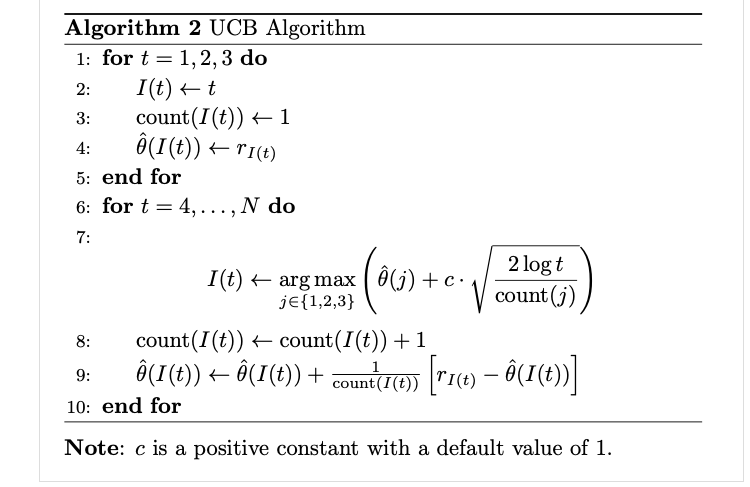

In [13]:
c = 0.7 
N = 30

bandit_0 = []
bandit_1 = []
bandit_2 = []

for iteration in range(1):
    
    # Initialize 
    Q_lst = [0.0, 0.0, 0.0] 
    N_lst = [1, 1, 1]       
    
    bandit_reward_prob = {0: 0.2, 1: 0.5, 2: 0.8}
    bandit_0_reward_lst = [-1 for i in range(N)]
    bandit_1_reward_lst = [-1 for i in range(N)]
    bandit_2_reward_lst = [-1 for i in range(N)]

    # Initialize reward 
    r=[]
    for t in range(3):  # t<=k 
      
        # init reward
        reward = np.random.binomial(n=1, p= bandit_reward_prob[t], size=1) # 0 or 1 
        if t==0:
            bandit_0_reward_lst[t] = reward
        elif t==1:
            bandit_1_reward_lst[t] = reward
        else:
            bandit_2_reward_lst[t] = reward
        
        # init r
        init_r = [0, 0, 0] 
        init_r[t] = reward
        r.append(init_r)   # ex. if reward=[1,1,0], r=[[1,0,0], [0,1,0], [0,0,0]]
        
        # init Q 
        Q_lst[t] = reward
    
    # Run
    bandit_ucb = [0,0,0] 
    for t in range(3, N):  # t > k
        
        # action 
        for i in range(3):
            bandit_ucb[i] = Q_lst[i] + c*math.sqrt(2*math.log(t)/N_lst[i])     # ucb 계산 
            reward = np.random.binomial(n=1, p= bandit_reward_prob[i], size=1) # reward 발생 
            r[i].append(reward)

        # choose bandit 
        bandit = bandit_ucb.index(max(bandit_ucb)) #ucb가 큰 bandit 선택 
        
        # update N 
        N_lst[bandit] += 1

        # update Q
        Q_lst[bandit] = Q_lst[bandit] + (1/N_lst[bandit])*(r[bandit][-1]- Q_lst[bandit])
        
        # regret 
        action = Q_lst[bandit] 
        optimal_action = max(Q_lst)
        regret = optimal_action-action
        
        # save reward 
        if bandit==0:
            bandit_0_reward_lst[t] = r[bandit][-1]
        elif bandit==1:
            bandit_1_reward_lst[t] = r[bandit][-1]
        else:
            bandit_2_reward_lst[t] = r[bandit][-1]

    bandit_0.append(bandit_0_reward_lst)
    bandit_1.append(bandit_1_reward_lst)
    bandit_2.append(bandit_2_reward_lst)


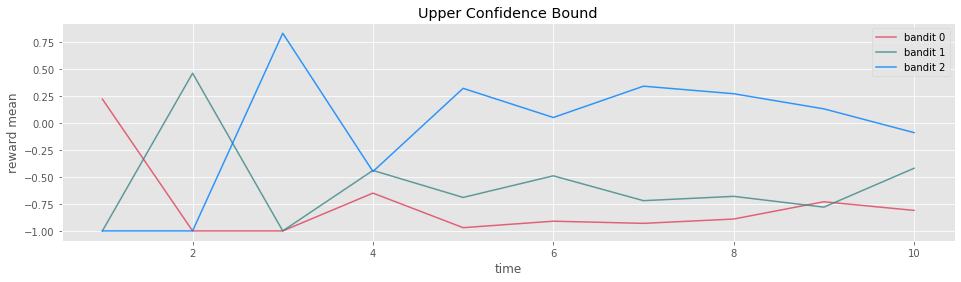

In [34]:
bandit_0_res = []
bandit_1_res = []
bandit_2_res = []

for i in range(N):
    
    b0=0 ; b1=0 ; b2=0
    for j in range(100):
        b0 += bandit_0[j][i]
        b1 += bandit_1[j][i]
        b2 += bandit_2[j][i]
    
    bandit_0_res.append(b0/100)
    bandit_1_res.append(b1/100)
    bandit_2_res.append(b2/100)

# Visualize result 
time_lst = [i+1 for i in range(N)]

plt.figure(figsize=(16,4))
style.use('ggplot')
plt.plot(time_lst, bandit_0_res, color = "#df405a", label = "bandit 0", alpha = 0.8)
plt.plot(time_lst, bandit_1_res, color = "#3b8686", label = "bandit 1", alpha = 0.8)
plt.plot(time_lst, bandit_2_res, color = "#0080ff", label = "bandit 2", alpha = 0.8)

plt.title("Upper Confidence Bound")
plt.xlabel('time')
plt.ylabel('reward mean')
plt.legend()
plt.show()

### 3. Tompson sampling 

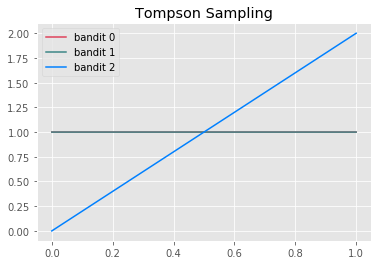

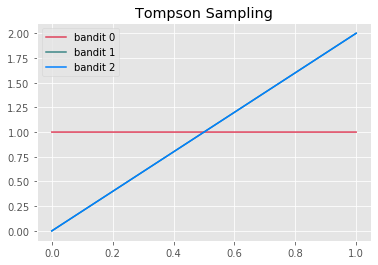

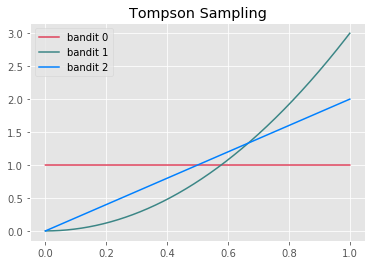

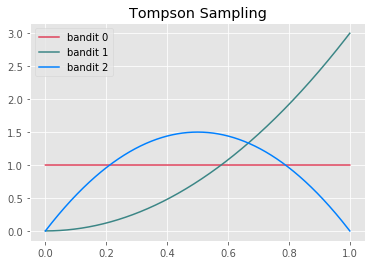

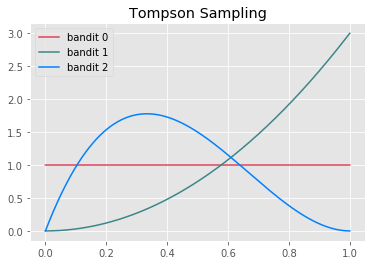

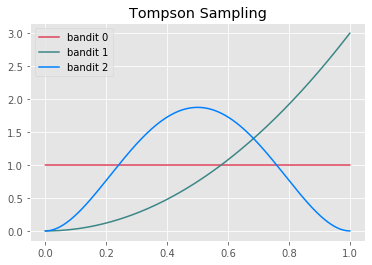

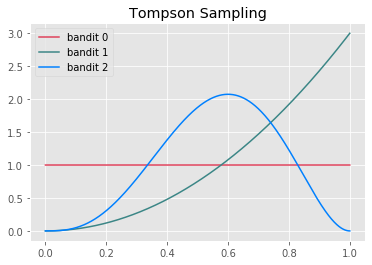

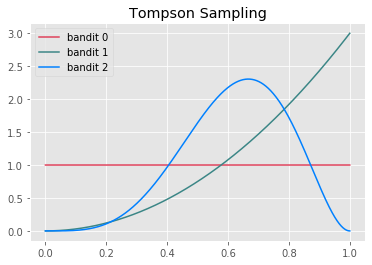

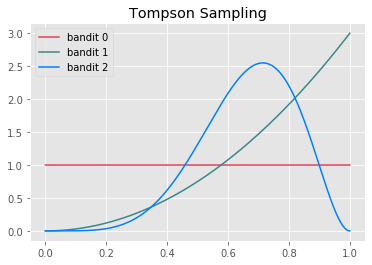

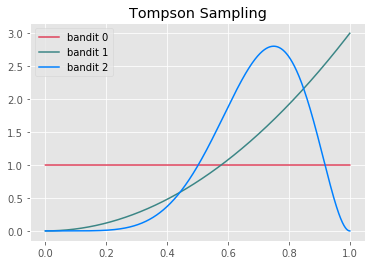

In [35]:
N = 10

bandit_0 = []
bandit_1 = []
bandit_2 = []

for iteration in range(100):

    # Initialize 
    alpha_lst =[1, 1, 1]
    beta_lst = [1, 1, 1]
    #bandit_reward_prob = {0: 0.2, 1: 0.5, 2: 0.8}
    bandit_0_reward_lst = [-1 for i in range(N)]
    bandit_1_reward_lst = [-1 for i in range(N)]
    bandit_2_reward_lst = [-1 for i in range(N)]
    
    # Run 
    for t in range(N): 
        
        # draw random sample from beta dist 
        Q_lst = []
        for i in range(3):
            beta_rv = float(beta.rvs(1, 1,size = 1))
            Q_lst.append(beta_rv)
        
        # choose bandit 
        bandit = Q_lst.index(max(Q_lst))
        reward = int(bernoulli.rvs(size = 1, p = max(Q_lst))) #reward 뽑기 
        if bandit==0:
            bandit_0_reward_lst[t] = reward
        elif bandit==1:
            bandit_1_reward_lst[t] = reward
        else:
            bandit_2_reward_lst[t] = reward
        
        # update alpha, beta 
        alpha_lst[bandit] = alpha_lst[bandit] + reward
        beta_lst[bandit] = beta_lst[bandit] -reward + 1
        
        # regret
        action = max(Q_lst)
        optimal_action = max([a/(a+b) for a,b in zip(alpha_lst, beta_lst)])
        regret = optimal_action-action 
        
        # plot 
        if iteration==0:
            x = np.linspace(0, 1, 10000)
            bandit_0_y = beta.pdf(x, alpha_lst[0], beta_lst[0])
            bandit_1_y = beta.pdf(x, alpha_lst[1], beta_lst[1])
            bandit_2_y = beta.pdf(x, alpha_lst[2], beta_lst[2])
            
            plt.plot(x, bandit_0_y, color = "#df405a", label = "bandit 0")
            plt.plot(x, bandit_1_y, color = "#3b8686", label = "bandit 1")
            plt.plot(x, bandit_2_y, color = "#0080ff", label = "bandit 2")
            plt.legend(loc='best')
            plt.title('Tompson Sampling')
            plt.show()

    # save reward 
    bandit_0.append(bandit_0_reward_lst)
    bandit_1.append(bandit_1_reward_lst)
    bandit_2.append(bandit_2_reward_lst)
    